## Model 
* Logistic Regression
* Decision Tree 
* Bagged Decision Tree
* Random Forest
* XGBoost
* Support Vector machine

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

sns.set_style('whitegrid') # set style for visualization
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/features_engineered.csv', encoding='utf-8')
df

SUBJECT_ID  SESSION_ID  TRIAL_ID  c_ml_min_r  c_ml_max_r  c_ml_min_l  \
0             510         413         1    0.087271    0.118247    0.087814   
1             510         413         2    0.085806    0.128396    0.040212   
2             510         413         3    0.073788    0.112735    0.049990   
3             510         413         4    0.056216    0.102832    0.086729   
4             510         413         6    0.064922    0.102404    0.000573   
...           ...         ...       ...         ...         ...         ...   
75727          93   999910375         6    0.057389    0.081491   -0.007720   
75728          93   999910375         7    0.060523    0.065029    0.077223   
75729          93   999910375         9    0.068348    0.103938    0.014182   
75730          93   999910375        10    0.032184    0.046935   -0.001137   
75731          93   999910375        11    0.008093    0.026037    0.061073   

       c_ml_max_l  c_ap_slope_r  c_ap_slope_l  g_ml_max1_r  ...  g_ap_max_l  \
0        0.128115      0.001718      0.002493     0.072643  ...    0.130772   
1        0.083074      0.001589      0.001834     0.072360  ...    0.136687   
2        0.099952      0.001740      0.001734     0.059417  ...    0.143187   
3        0.127982      0.001919      0.001361     0.079792  ...    0.155758   
4        0.052266      0.001837      0.002049     0.059537  ...    0.140561   
...           ...           ...           ...          ...  ...         ...   
75727   -0.005253      0.001445      0.000769     0.027693  ...    0.296245   
75728    0.107414      0.001117      0.001277     0.069434  ...    0.313936   
75729    0.031058      0.001457      0.001514     0.042854  ...    0.317704   
75730    0.021139      0.001090      0.001431     0.048381  ...    0.310775   
75731    0.072381      0.001968      0.002512     0.044981  ...    0.277218   

       g_v_max1_r  g_v_min_r  g_v_max2_r  g_v_max1_l  g_v_min_l  g_v_max2_l  \
0        1.035925   0.818121    0.987930    1.083287   0.796622    1.003385   
1        1.009803   0.819649    0.991990    1.018526   0.837006    0.999401   
2        1.010970   0.823223    0.989883    1.049092   0.815221    1.003578   
3        1.047625   0.797822    1.005463    1.118118   0.773203    1.021851   
4        1.044787   0.780821    1.009273    1.084354   0.820851    1.027245   
...           ...        ...         ...         ...        ...         ...   
75727    1.227360   0.635865    1.188197    1.210305   0.600266    0.862586   
75728    1.360617   0.653168    1.074324    1.195931   0.691509    1.105625   
75729    1.220940   0.697688    1.129716    1.132665   0.683090    1.187864   
75730    1.221073   0.704733    1.160231    1.155511   0.767917    1.133180   
75731    1.142643   0.700183    1.171400    1.025454   0.756246    1.168083   

       AGE        BMI  CLASS_LABEL  
0       47  35.538442            C  
1       47  35.538442            C  
2       47  35.538442            C  
3       47  35.538442            C  
4       47  35.538442            C  
...    ...        ...          ...  
75727   53  21.588183           HC  
75728   53  21.588183           HC  
75729   53  21.588183           HC  
75730   53  21.588183           HC  
75731   53  21.588183           HC  

[75732 rows x 28 columns]

In [3]:
df.isna().sum().loc[lambda x : x>0].sort_values(ascending=False)

BMI    26992
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(48740, 28)

In [6]:
df.columns

Index(['SUBJECT_ID', 'SESSION_ID', 'TRIAL_ID', 'c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l', 'AGE', 'BMI', 'CLASS_LABEL'],
      dtype='object')

<AxesSubplot:xlabel='CLASS_LABEL'>

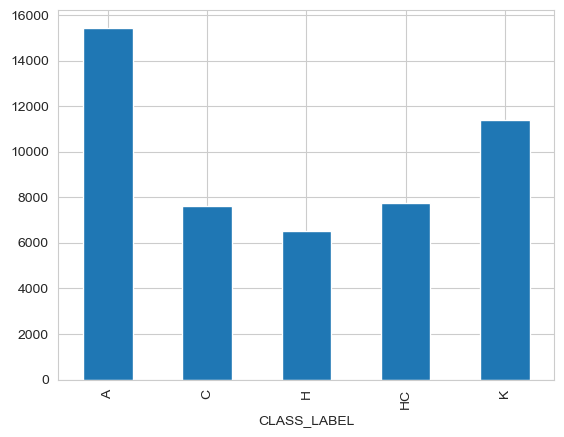

In [7]:
#https://seaborn.pydata.org/generated/seaborn.histplot.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
df.groupby(['CLASS_LABEL']).size().plot.bar()

In [8]:
df.loc[(df.CLASS_LABEL=='HC') , df.columns[3:-3]].mean()

c_ml_min_r      0.027764
c_ml_max_r      0.056637
c_ml_min_l      0.030379
c_ml_max_l      0.055137
c_ap_slope_r    0.001956
c_ap_slope_l    0.002013
g_ml_max1_r     0.045210
g_ml_min_r      0.018124
g_ml_max2_r     0.039144
g_ml_max1_l     0.049307
g_ml_min_l      0.018506
g_ml_max2_l     0.037234
g_ap_min_r     -0.180428
g_ap_max_r      0.217849
g_ap_min_l     -0.181881
g_ap_max_l      0.217483
g_v_max1_r      1.128904
g_v_min_r       0.736922
g_v_max2_r      1.100921
g_v_max1_l      1.125703
g_v_min_l       0.737771
g_v_max2_l      1.100139
dtype: float64

In [9]:
def plot_features(df):
    # Plot
    fig, ax = plt.subplots()
    #HC
    l_hc = mpatches.Patch(color='green', label='HC')
    df.loc[(df.CLASS_LABEL=='HC') , df.columns[3:-3]].mean().plot(color='green')
    #C
    l_c = mpatches.Patch(color='blue', label='C')
    df.loc[(df.CLASS_LABEL=='C') , df.columns[3:-3]].mean().plot(color='blue')
    #A
    l_a = mpatches.Patch(color='orange', label='A')
    df.loc[(df.CLASS_LABEL=='A') , df.columns[3:-3]].mean().plot(color='orange')
    #K
    l_k = mpatches.Patch(color='red', label='K')
    df.loc[(df.CLASS_LABEL=='K') , df.columns[3:-3]].mean().plot(color='red')
    #H
    l_h = mpatches.Patch(color='purple', label='H')
    df.loc[(df.CLASS_LABEL=='H') , df.columns[3:-3]].mean().plot(color='purple')
    
    plt.legend(loc="upper right",handles=[l_hc,l_c,l_a,l_k,l_h])
    plt.title('Participant')
    plt.xlabel('Features')
    plt.locator_params(axis="x", nbins=5)
    plt.ylabel('Data')
    plt.show()

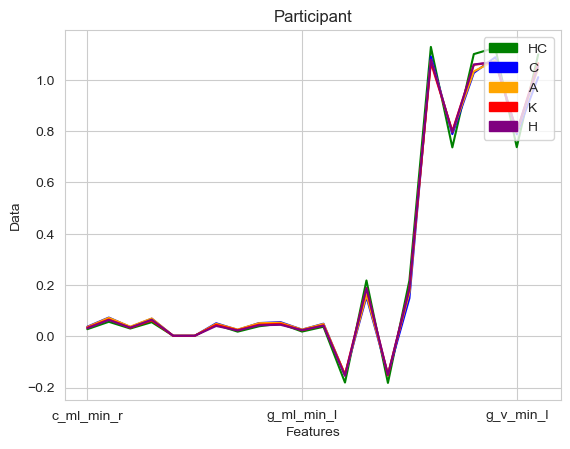

In [10]:
plot_features(df)

### Multi-Class Logistic Regression
* Pipeline
* Params Grid
* Get the best model and score

In [11]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']

X.head()

c_ml_min_r  c_ml_max_r  c_ml_min_l  c_ml_max_l  c_ap_slope_r  c_ap_slope_l  \
0    0.087271    0.118247    0.087814    0.128115      0.001718      0.002493   
1    0.085806    0.128396    0.040212    0.083074      0.001589      0.001834   
2    0.073788    0.112735    0.049990    0.099952      0.001740      0.001734   
3    0.056216    0.102832    0.086729    0.127982      0.001919      0.001361   
4    0.064922    0.102404    0.000573    0.052266      0.001837      0.002049   

   g_ml_max1_r  g_ml_min_r  g_ml_max2_r  g_ml_max1_l  ...  g_ap_min_l  \
0     0.072643    0.054219     0.092262     0.080701  ...   -0.188082   
1     0.072360    0.049335     0.076352     0.061662  ...   -0.155082   
2     0.059417    0.041625     0.072352     0.070566  ...   -0.168801   
3     0.079792    0.051674     0.084093     0.070156  ...   -0.190634   
4     0.059537    0.038833     0.070828     0.059307  ...   -0.205468   

   g_ap_max_l  g_v_max1_r  g_v_min_r  g_v_max2_r  g_v_max1_l  g_v_min_l  \
0    0.130772    1.035925   0.818121    0.987930    1.083287   0.796622   
1    0.136687    1.009803   0.819649    0.991990    1.018526   0.837006   
2    0.143187    1.010970   0.823223    0.989883    1.049092   0.815221   
3    0.155758    1.047625   0.797822    1.005463    1.118118   0.773203   
4    0.140561    1.044787   0.780821    1.009273    1.084354   0.820851   

   g_v_max2_l  AGE        BMI  
0    1.003385   47  35.538442  
1    0.999401   47  35.538442  
2    1.003578   47  35.538442  
3    1.021851   47  35.538442  
4    1.027245   47  35.538442  

[5 rows x 24 columns]

In [12]:
numeric_features = ['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = []
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

lc = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression(solver='lbfgs'))]
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lc.fit(X_train, y_train)
print("model score: %.3f" % lc.score(X_test, y_test))

model score: 0.502


In [14]:
%%time
param_grid = {
    "classifier__C": [0.1, 1.0, 10, 100],
    "classifier__penalty": ['l2', None],
    "classifier__multi_class": ['ovr', 'multinomial'],
}

gs_lc = GridSearchCV(lc,
                  param_grid,
                  cv=5)

gs_lc.fit(X_train, y_train)

CPU times: total: 1min 12s
Wall time: 1min 21s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['c_ml_min_r',
                                                                          'c_ml_max_r',
                                                                          'c_ml_min_l',
                                                                          'c_ml_max_l',
                                                                          'c_ap_slope_r',
                                                                          'c_ap_slope_l',
                                                                          'g_ml_max1_r',
                                                                          'g_ml_min_r',
                                                                          'g_ml_max2_r',
                                                                          'g_ml_max1_l',
                                                                          'g_ml_min_l',
                                                                          'g_ml_max...
                                                                          'g_ap_max_l',
                                                                          'g_v_max1_r',
                                                                          'g_v_min_r',
                                                                          'g_v_max2_r',
                                                                          'g_v_max1_l',
                                                                          'g_v_min_l',
                                                                          'g_v_max2_l',
                                                                          'AGE',
                                                                          'BMI']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'classifier__multi_class': ['ovr', 'multinomial'],
                         'classifier__penalty': ['l2', None]})

In [15]:
print("Best params:")
print(gs_lc.best_params_)
print(f"Training CV score: {gs_lc.best_score_:.3f}")

Best params:
{'classifier__C': 0.1, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}
Training CV score: 0.494


In [16]:
cv_results = pd.DataFrame(gs_lc.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_classifier__C",
        "param_classifier__penalty",
        "param_classifier__multi_class"
    ]
].head(5)

mean_test_score  std_test_score param_classifier__C  \
2          0.494269        0.006755                 0.1   
14         0.494187        0.006382                 100   
10         0.494159        0.006350                  10   
6          0.494132        0.006403                 1.0   
8          0.490767        0.005167                  10   

   param_classifier__penalty param_classifier__multi_class  
2                         l2                   multinomial  
14                        l2                   multinomial  
10                        l2                   multinomial  
6                         l2                   multinomial  
8                         l2                           ovr

In [17]:
y_pred = gs_lc.best_estimator_.predict(X_test)
cm = multilabel_confusion_matrix(y_test, y_pred)
cm

array([[[5702, 2571],
        [1309, 2603]],

       [[9730,  498],
        [1068,  889]],

       [[9970,  652],
        [1128,  435]],

       [[9342,  860],
        [ 957, 1026]],

       [[7938, 1477],
        [1596, 1174]]], dtype=int64)

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [19]:
results = pd.DataFrame([], columns = ['Model', 'Parameters', 'Train Score', 'Test Score'])

In [20]:
results = results.append({'Model': 'Logistic Regression', 
                          'Parameters': gs_lc.best_params_,
                          'Train Score': gs_lc.score(X_test,y_test),
                          'Test Score': gs_lc.best_score_
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression   

                                                                                      Parameters  \
0  {'classifier__C': 0.1, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}   

   Train Score  Test Score  
0  0.502831     0.494269

## Decision tree

In [21]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']

In [22]:
dt = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 2,
                            min_samples_leaf = 2,
                            ccp_alpha = 0.05,
                            random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
dt.fit(X_train, y_train)
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.3170291341813705
Score on testing set: 0.3170291341813705


In [23]:
%%time
gs_dt = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [3,5,7],
                                  'min_samples_split': [3,4,5],
                                  'min_samples_leaf': [2,3],
                                  'max_leaf_nodes': [10,20,30],
                                  'ccp_alpha': [0.001]},
                    cv = 3,
                    verbose = 1)
gs_dt.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: total: 2min 12s
Wall time: 2min 34s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001], 'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4, 5]},
             verbose=1)

In [24]:
gs_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=3)

In [25]:
print(f'Score on training set: {gs_dt.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_dt.best_estimator_.score(X_test, y_test)}')

Score on training set: 0.47889481603063877
Score on testing set: 0.4718096019696348


In [26]:
results = results.append({'Model': 'Decision Tree', 
                          'Parameters': gs_dt.best_params_,
                          'Train Score': gs_dt.best_score_,
                          'Test Score': gs_dt.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression   
1  Decision Tree         

                                                                                                  Parameters  \
0  {'classifier__C': 0.1, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}               
1  {'ccp_alpha': 0.001, 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 3}   

   Train Score  Test Score  
0  0.502831     0.494269    
1  0.460293     0.471810

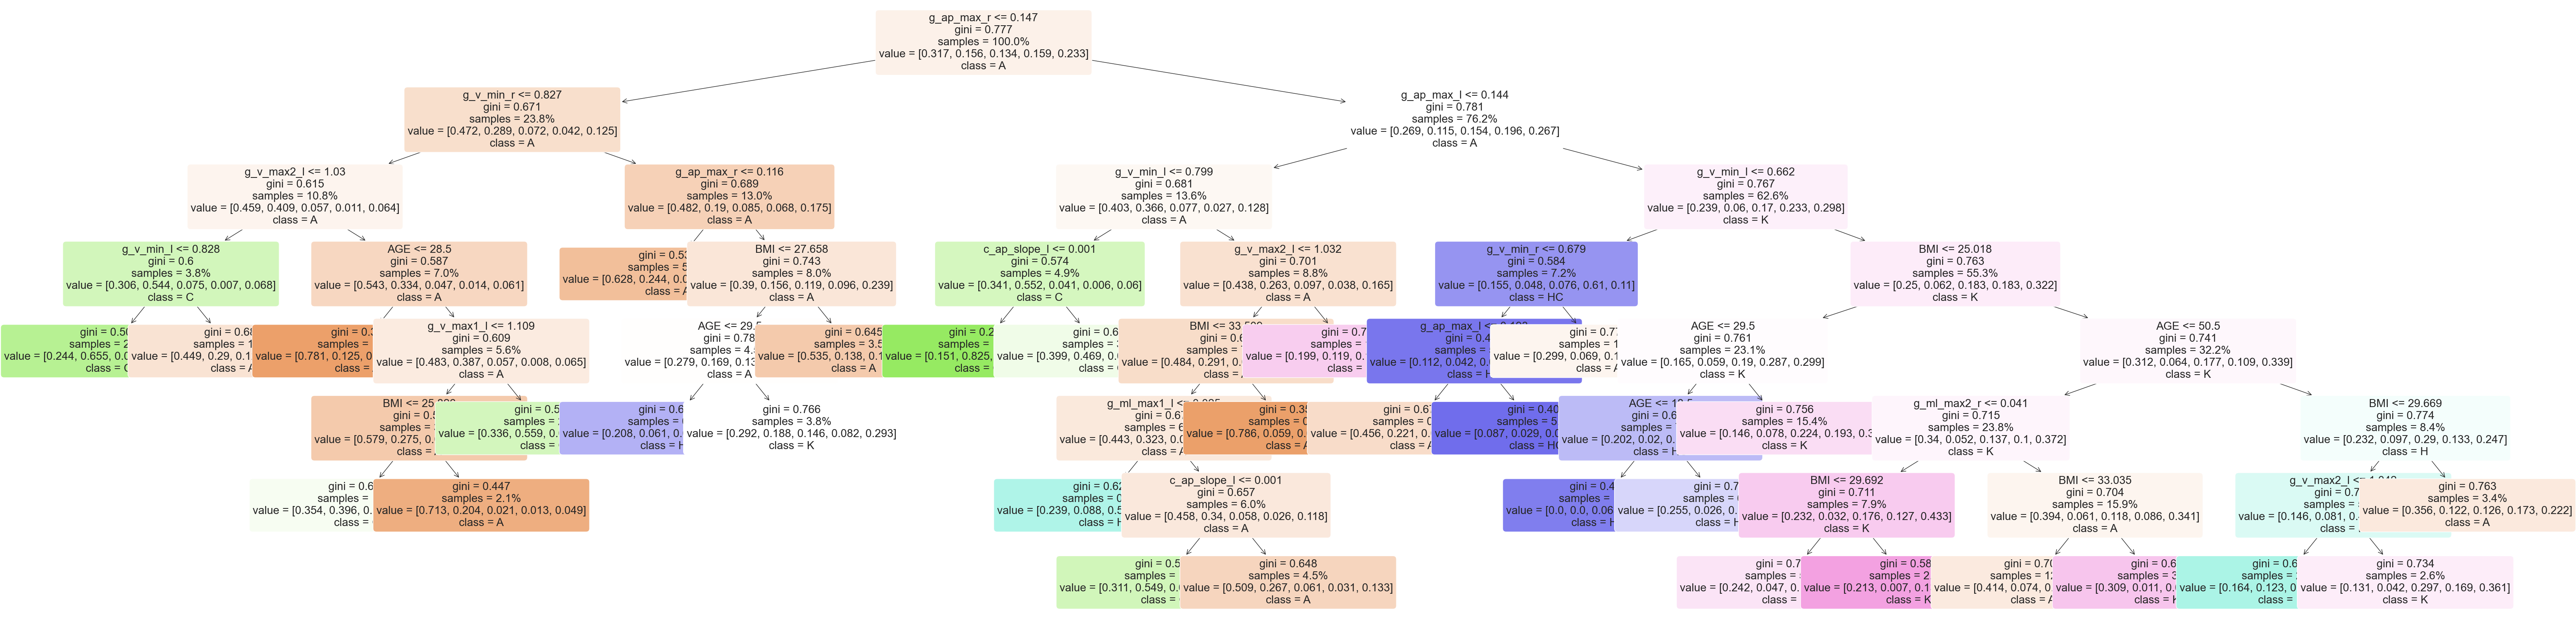

In [27]:
from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (80, 20))

# Plot our tree.
plot_tree(gs_dt.best_estimator_,
          feature_names = X_train.columns,
          class_names = gs_dt.classes_,
          filled = True, 
          fontsize=20,
          proportion = True,
          rounded=True);

In [28]:
# Import export_text from sklearn.tree module.
from sklearn.tree import export_text

# Print out tree in plaintext.
print(export_text(gs_dt.best_estimator_,
                  feature_names=list(X_train.columns)))

|--- g_ap_max_r <= 0.15
|   |--- g_v_min_r <= 0.83
|   |   |--- g_v_max2_l <= 1.03
|   |   |   |--- g_v_min_l <= 0.83
|   |   |   |   |--- class: C
|   |   |   |--- g_v_min_l >  0.83
|   |   |   |   |--- class: A
|   |   |--- g_v_max2_l >  1.03
|   |   |   |--- AGE <= 28.50
|   |   |   |   |--- class: A
|   |   |   |--- AGE >  28.50
|   |   |   |   |--- g_v_max1_l <= 1.11
|   |   |   |   |   |--- BMI <= 25.83
|   |   |   |   |   |   |--- class: C
|   |   |   |   |   |--- BMI >  25.83
|   |   |   |   |   |   |--- class: A
|   |   |   |   |--- g_v_max1_l >  1.11
|   |   |   |   |   |--- class: C
|   |--- g_v_min_r >  0.83
|   |   |--- g_ap_max_r <= 0.12
|   |   |   |--- class: A
|   |   |--- g_ap_max_r >  0.12
|   |   |   |--- BMI <= 27.66
|   |   |   |   |--- AGE <= 29.50
|   |   |   |   |   |--- class: HC
|   |   |   |   |--- AGE >  29.50
|   |   |   |   |   |--- class: K
|   |   |   |--- BMI >  27.66
|   |   |   |   |--- class: A
|--- g_ap_max_r >  0.15
|   |--- g_ap_max_l <= 0.14
|  

**Findings**
* Decision tree has 47% accuracy for a 5-class classification  (Random model would have 20% accuracy)
* Lesser accuracy than Logistic regression <br>
* No need to scale our data.
* No assumptions about how  data is distributed
* Easier to interpret than Logistic Regression

### Bagging Trees
* Pipeline
* Params Grid
* Get the best model and score

In [29]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [30]:
%%time
bc = BaggingClassifier(DecisionTreeClassifier(ccp_alpha=0.003, max_depth=5, max_leaf_nodes=15,
                                              min_samples_leaf=2, min_samples_split=3,
                                              random_state=42),
                              n_estimators=100,
                              bootstrap=True,
                              random_state=42)
bc.fit(X_train, y_train)
print(f'Score on training set: {bc.score(X_train, y_train)}')
print(f'Score on testing set: {bc.score(X_test, y_test)}')

Score on training set: 0.4473533032416906
Score on testing set: 0.43947476405416497
CPU times: total: 1min 20s
Wall time: 1min 31s


In [31]:
bc.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.003, max_depth=5, max_leaf_nodes=15,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=1952926171)

In [32]:
# Print out tree in plaintext.
print(export_text(bc.estimators_[1],
                  feature_names=list(X_train.columns)))

|--- g_ap_max_r <= 0.14
|   |--- g_v_min_l <= 0.85
|   |   |--- class: 0
|   |--- g_v_min_l >  0.85
|   |   |--- class: 0
|--- g_ap_max_r >  0.14
|   |--- g_ap_max_l <= 0.14
|   |   |--- g_v_min_l <= 0.81
|   |   |   |--- class: 1
|   |   |--- g_v_min_l >  0.81
|   |   |   |--- class: 0
|   |--- g_ap_max_l >  0.14
|   |   |--- g_v_min_l <= 0.66
|   |   |   |--- g_v_min_r <= 0.66
|   |   |   |   |--- class: 3
|   |   |   |--- g_v_min_r >  0.66
|   |   |   |   |--- class: 3
|   |   |--- g_v_min_l >  0.66
|   |   |   |--- AGE <= 29.50
|   |   |   |   |--- BMI <= 24.99
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- BMI >  24.99
|   |   |   |   |   |--- class: 4
|   |   |   |--- AGE >  29.50
|   |   |   |   |--- BMI <= 25.12
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- BMI >  25.12
|   |   |   |   |   |--- class: 0



In [33]:
%%time
param_grid = {
    'base_estimator__max_depth' : [5,7],
    'base_estimator__max_leaf_nodes' : [10,20,30],
    'base_estimator__ccp_alpha': [0.001],
    'max_samples' : [0.3, 0.5],
    'n_estimators': [100],
    'base_estimator__min_samples_leaf':[2], 
    'base_estimator__min_samples_split':[3],
}

gs_bc = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42)), param_grid)
gs_bc.fit(X_train, y_train)
print(f'Score on training set: {gs_bc.score(X_train, y_train)}')
print(f'Score on testing set: {gs_bc.score(X_test, y_test)}'),

Score on training set: 0.5241964163589112
Score on testing set: 0.5114485022568732
CPU times: total: 25min 28s
Wall time: 29min 59s


(None,)

In [34]:
gs_bc.best_params_

{'base_estimator__ccp_alpha': 0.001,
 'base_estimator__max_depth': 7,
 'base_estimator__max_leaf_nodes': 30,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 3,
 'max_samples': 0.3,
 'n_estimators': 100}

In [35]:
gs_bc.best_estimator_.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=828402094)

In [36]:
results = results.append({'Model': 'Bagging Classifier (Decision tree)', 
                          'Parameters': gs_bc.best_params_,
                          'Train Score': gs_bc.best_score_,
                          'Test Score': gs_bc.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   

                                                                                                                                                                                                                           Parameters  \
0  {'classifier__C': 0.1, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                        
1  {'ccp_alpha': 0.001, 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                            
2  {'base_estimator__ccp_alpha': 0.001, 'base_estimator__max_depth': 7, 'base_estimator__max_leaf_nodes': 30, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 100}   

   Train Score  Test Score  
0  0.502831     0.494269    
1  0.460293     0.471810    
2  0.513582     0.511449

In [37]:
# First tree in text format
print(export_text(gs_bc.best_estimator_.estimators_[0],
                  feature_names=list(X_train.columns)))

|--- g_ap_max_r <= 0.14
|   |--- g_v_min_l <= 0.85
|   |   |--- g_v_max2_l <= 1.03
|   |   |   |--- g_ml_max1_l <= 0.05
|   |   |   |   |--- class: 0
|   |   |   |--- g_ml_max1_l >  0.05
|   |   |   |   |--- class: 1
|   |   |--- g_v_max2_l >  1.03
|   |   |   |--- AGE <= 44.50
|   |   |   |   |--- g_v_max1_r <= 1.12
|   |   |   |   |   |--- g_v_max1_r <= 1.00
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- g_v_max1_r >  1.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- g_v_max1_r >  1.12
|   |   |   |   |   |--- class: 1
|   |   |   |--- AGE >  44.50
|   |   |   |   |--- class: 1
|   |--- g_v_min_l >  0.85
|   |   |--- BMI <= 28.10
|   |   |   |--- g_ap_max_r <= 0.12
|   |   |   |   |--- g_ml_max1_l <= 0.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- g_ml_max1_l >  0.05
|   |   |   |   |   |--- class: 0
|   |   |   |--- g_ap_max_r >  0.12
|   |   |   |   |--- class: 4
|   |   |--- BMI >  28.10
|   |   |   |--- class: 0
|--- g_ap_max_r >  0.14
| 

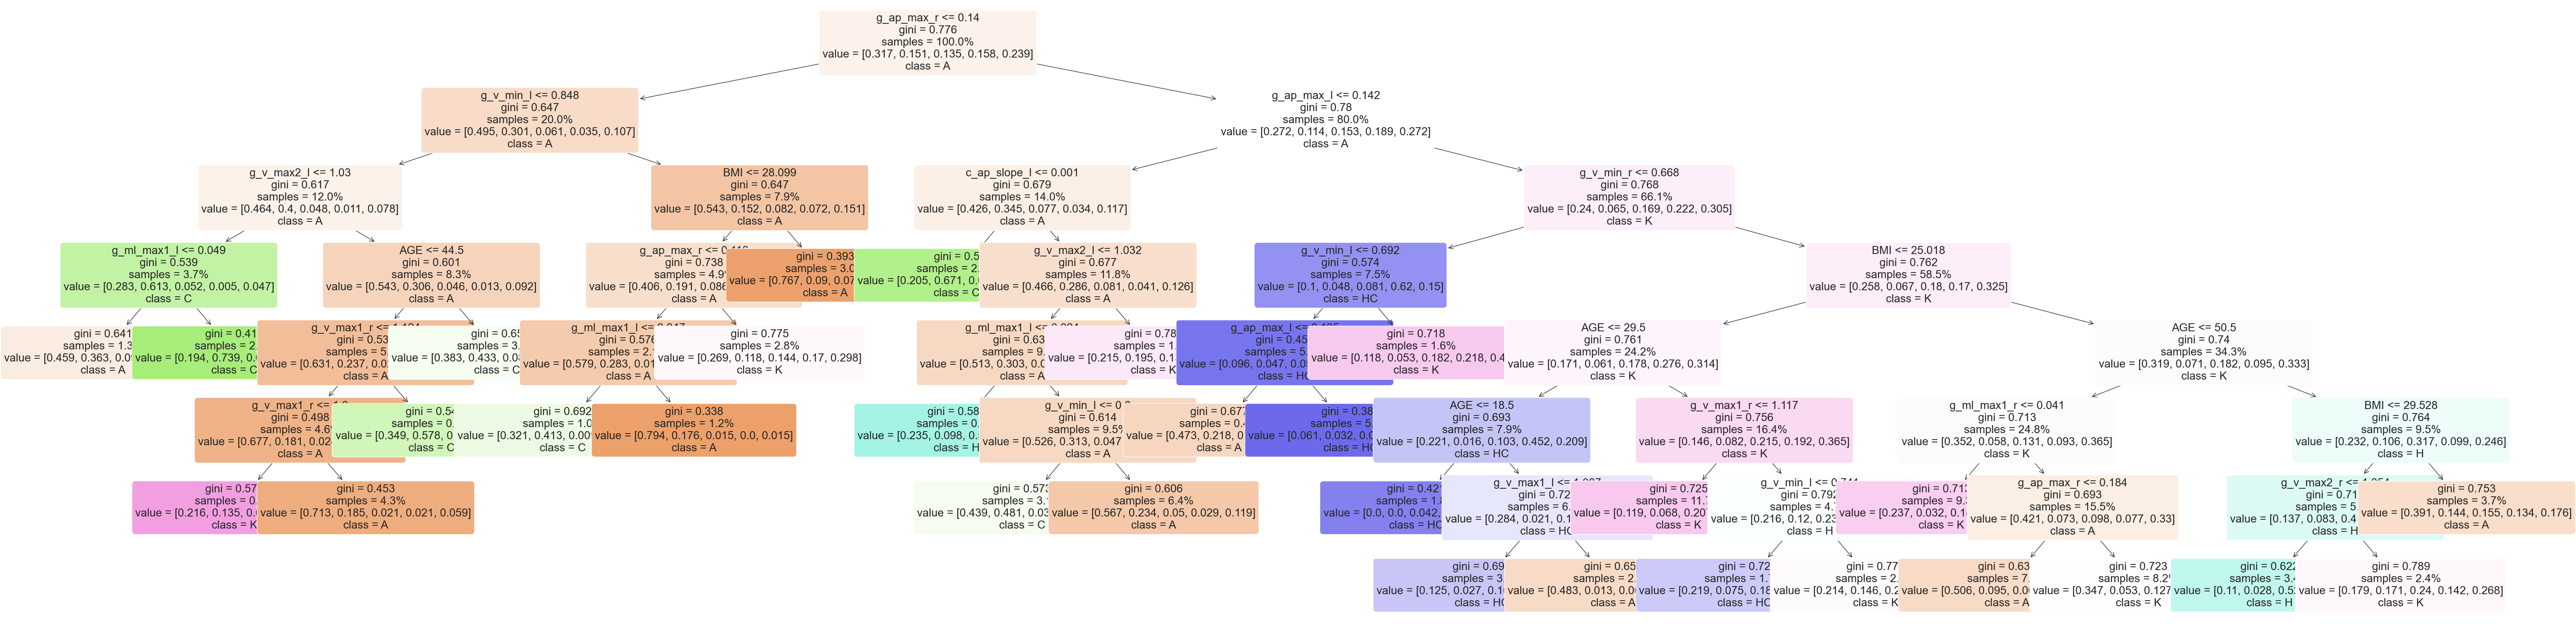

In [38]:
# First Tree in the bagged classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_bc.best_estimator_.estimators_[0],
          feature_names = X_train.columns,
          class_names = bc.classes_,
          filled = True, 
          fontsize=20,
          proportion = True,
          rounded=True);

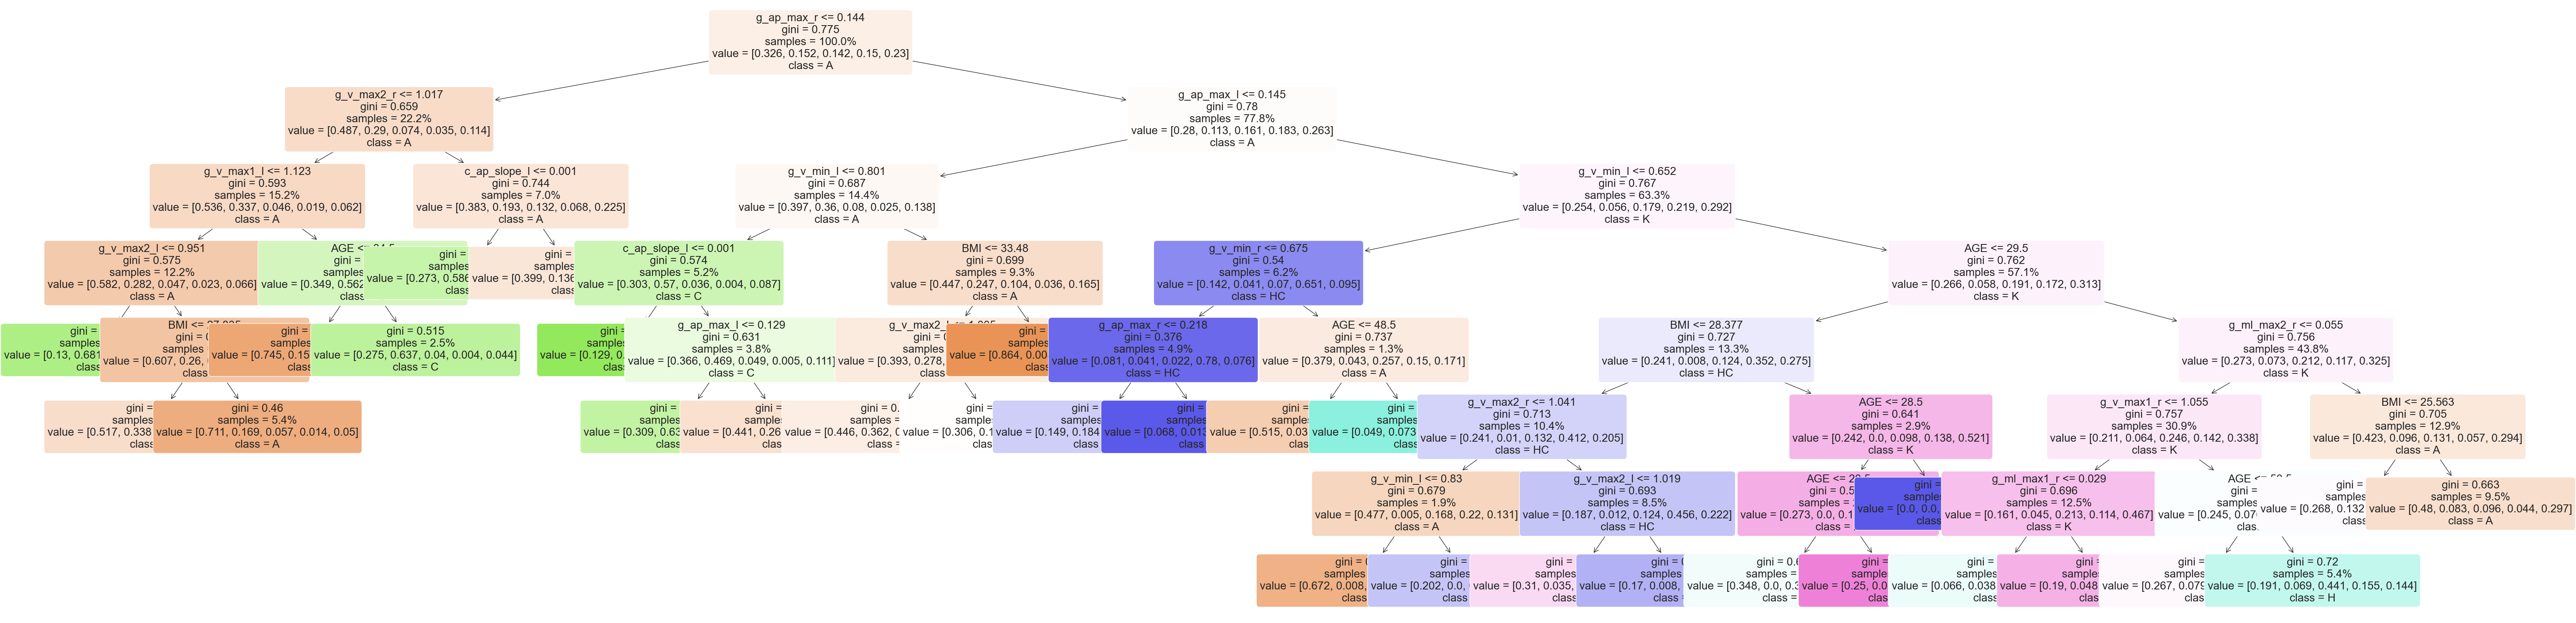

In [39]:
# Plot second tree in the bag classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_bc.best_estimator_.estimators_[1],
              feature_names = X_train.columns,
              class_names = bc.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

### Random Forests

In [40]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [41]:
%%time
rf = RandomForestClassifier(n_estimators=100,
                            ccp_alpha=0.001, 
                            max_depth=7, 
                            max_leaf_nodes=30,
                            min_samples_leaf=2, 
                            min_samples_split=3,
                            random_state=42)
cross_val_score(rf, X_train, y_train, cv=5).mean()

CPU times: total: 29.8 s
Wall time: 30.3 s


0.49470660648338116

In [42]:
%%time
rf_params = {
    'n_estimators': [100],
    'ccp_alpha': [0.001],
    'max_depth':[3,5,7],
    'max_leaf_nodes':[10,20,30]
}
gs_rf = GridSearchCV(rf, param_grid=rf_params, cv=3)
gs_rf.fit(X_train, y_train)

print(f'Score on training set: {gs_rf.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_rf.best_estimator_.score(X_test, y_test)}')

Score on training set: 0.5027492819039803
Score on testing set: 0.48871563397620027
CPU times: total: 1min 56s
Wall time: 1min 58s


In [43]:
gs_rf.best_params_

{'ccp_alpha': 0.001, 'max_depth': 7, 'max_leaf_nodes': 30, 'n_estimators': 100}

In [44]:
gs_rf.best_estimator_.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='sqrt',
                       max_leaf_nodes=30, min_samples_leaf=2,
                       min_samples_split=3, random_state=1608637542)

In [45]:
# First tree in text format
print(export_text(gs_rf.best_estimator_.estimators_[0],
                  feature_names=list(X_train.columns)))

|--- AGE <= 29.50
|   |--- g_v_min_r <= 0.63
|   |   |--- BMI <= 31.43
|   |   |   |--- class: 3.0
|   |   |--- BMI >  31.43
|   |   |   |--- class: 4.0
|   |--- g_v_min_r >  0.63
|   |   |--- g_v_max1_l <= 1.02
|   |   |   |--- g_v_min_l <= 0.87
|   |   |   |   |--- class: 4.0
|   |   |   |--- g_v_min_l >  0.87
|   |   |   |   |--- class: 3.0
|   |   |--- g_v_max1_l >  1.02
|   |   |   |--- g_v_max2_r <= 1.05
|   |   |   |   |--- g_v_min_l <= 0.88
|   |   |   |   |   |--- g_ap_max_r <= 0.14
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- g_ap_max_r >  0.14
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- g_v_min_l >  0.88
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- g_v_max2_r >  1.05
|   |   |   |   |--- g_v_max2_l <= 1.02
|   |   |   |   |   |--- g_ap_max_l <= 0.16
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- g_ap_max_l >  0.16
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- g_v_max2_l >  1.02
|   |   |   |   |   

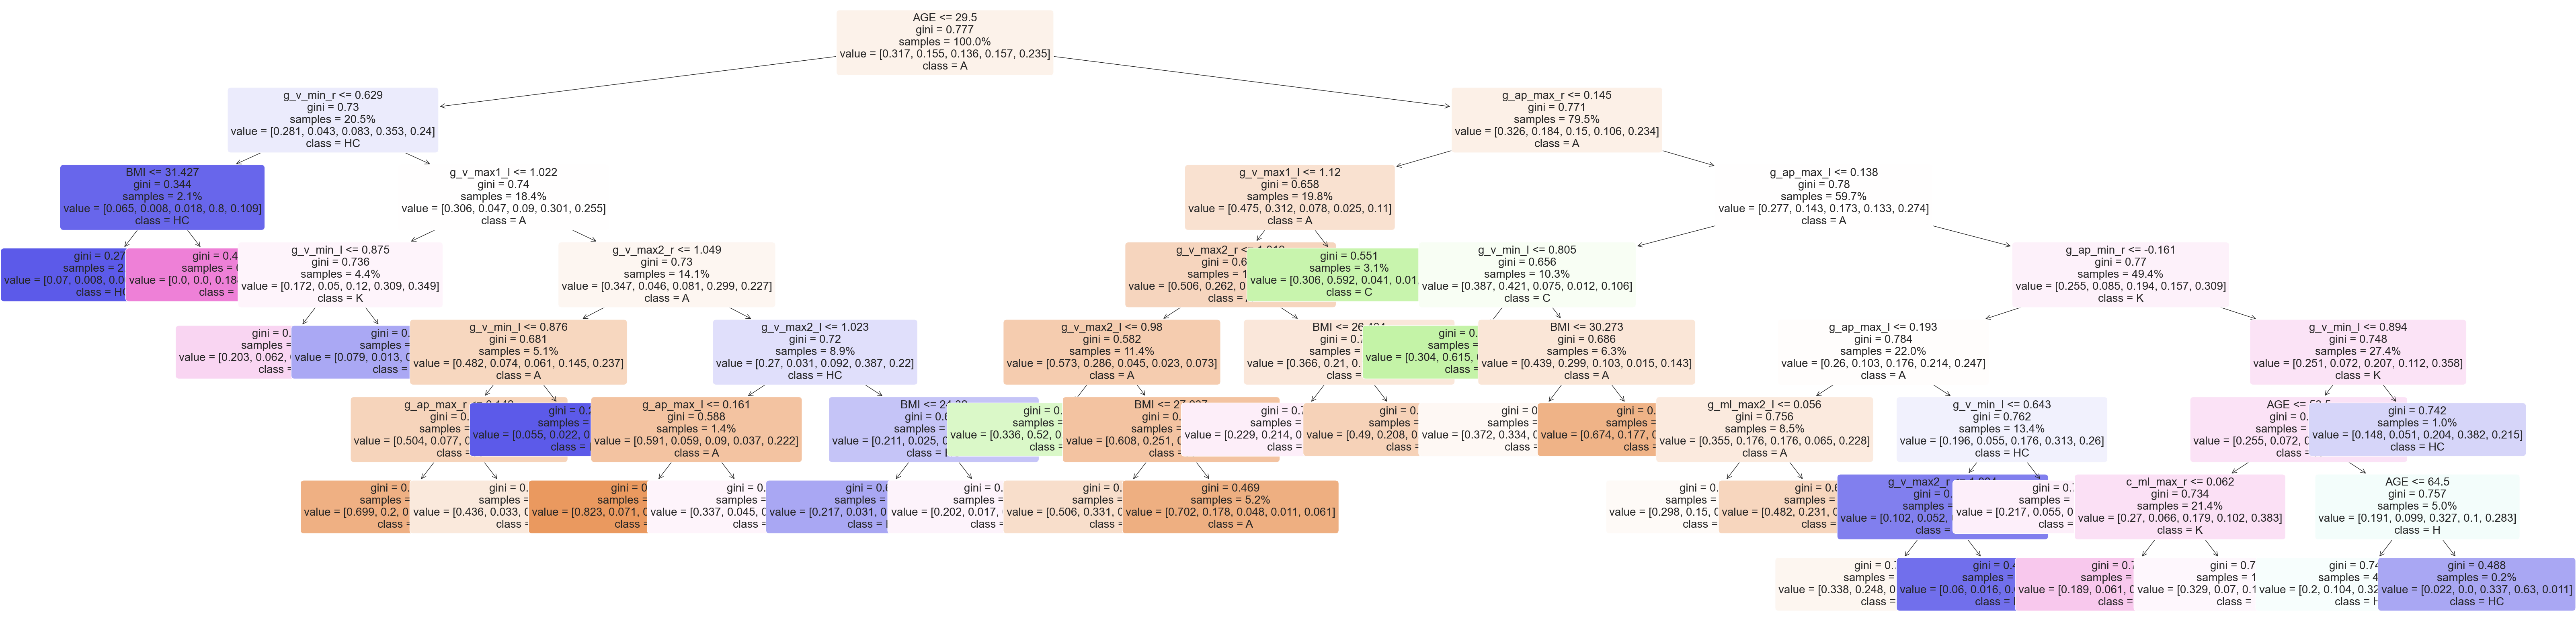

In [46]:
# Plot first tree in the bag classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_rf.best_estimator_.estimators_[0],
              feature_names = X_train.columns,
              class_names = bc.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

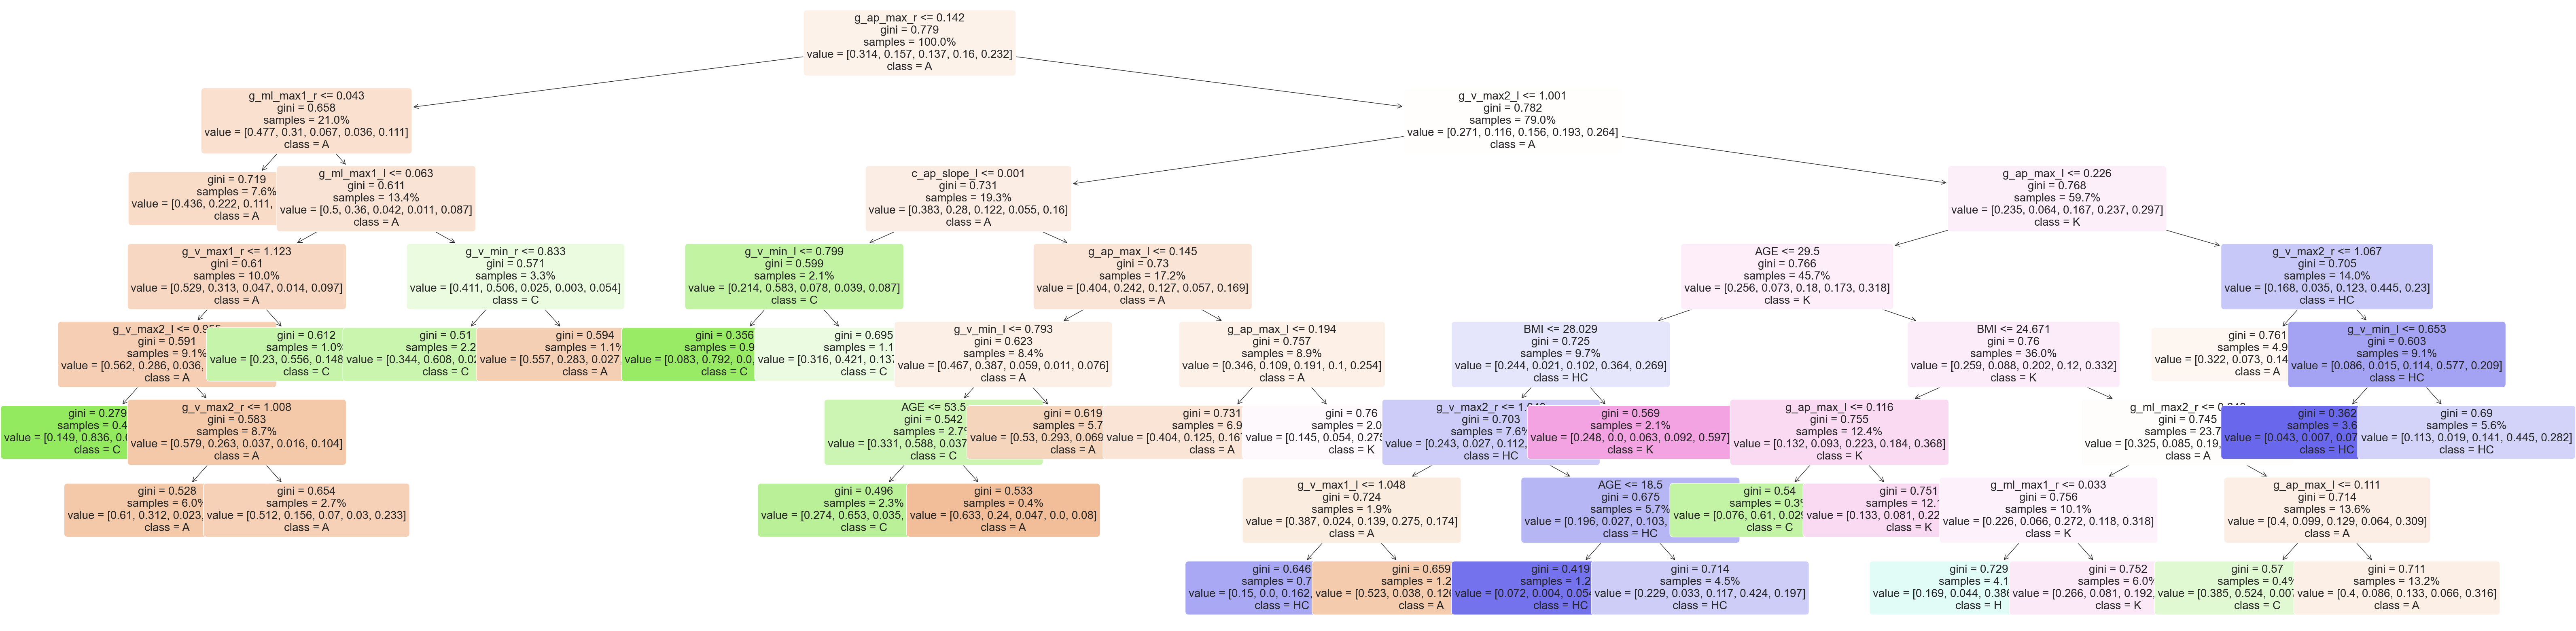

In [47]:
# Plot 100th tree in the bag classifier
plt.figure(figsize = (80, 20))
plot_tree(gs_rf.best_estimator_.estimators_[99],
              feature_names = X_train.columns,
              class_names = bc.classes_,
              filled = True, 
              fontsize=20,
              proportion = True,
              rounded=True);

In [48]:
print(f"{gs_rf.best_estimator_}")

RandomForestClassifier(ccp_alpha=0.001, max_depth=7, max_leaf_nodes=30,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=42)


In [49]:
results = results.append({'Model': 'Random Forest', 
                          'Parameters': gs_rf.best_estimator_[0],
                          'Train Score': gs_rf.best_score_,
                          'Test Score': gs_rf.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   
3  Random Forest                        

                                                                                                                                                                                                                           Parameters  \
0  {'classifier__C': 0.1, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                        
1  {'ccp_alpha': 0.001, 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                            
2  {'base_estimator__ccp_alpha': 0.001, 'base_estimator__max_depth': 7, 'base_estimator__max_leaf_nodes': 30, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 100}   
3  DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='sqrt',\n                       max_leaf_nodes=30, min_samples_leaf=2,\n                       min_samples_split=3, random_state=1608637542)                       

   Train Score  Test Score  
0  0.502831     0.494269    
1  0.460293     0.471810    
2  0.513582     0.511449    
3  0.495856     0.488716

## Gradient Boosting

In [50]:
X= df[['c_ml_min_r', 'c_ml_max_r',
       'c_ml_min_l', 'c_ml_max_l', 'c_ap_slope_r', 'c_ap_slope_l',
       'g_ml_max1_r', 'g_ml_min_r', 'g_ml_max2_r', 'g_ml_max1_l', 'g_ml_min_l',
       'g_ml_max2_l', 'g_ap_min_r', 'g_ap_max_r', 'g_ap_min_l', 'g_ap_max_l',
       'g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [51]:
%%time
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [7],
    'n_estimators': [100],
    'learning_rate': [.1]
}
gs_gboost = GridSearchCV(gboost, param_grid=gboost_params)
gs_gboost.fit(X_train, y_train)

print(f'Score on training set: {gs_gboost.best_estimator_.score(X_train, y_train)}')
print(f'Score on testing set: {gs_gboost.best_estimator_.score(X_test, y_test)}')
print(gs_gboost.best_params_)

Score on training set: 0.9685679113664342
Score on testing set: 0.8590890439064424
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
CPU times: total: 26min 29s
Wall time: 27min 16s


In [52]:
gs_gboost.best_estimator_.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1F0C1070340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1F0C1070340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1F0C1070340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1F0C1070340),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                             random_state=RandomState(MT19937) at 0x1F0C1070340)],
      dtype=object)

In [61]:
gs_gboost.best_estimator_.estimators_[0][1]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      random_state=RandomState(MT19937) at 0x1F0C1070340)

In [62]:
gs_gboost.best_score_

0.8510463684858433

In [63]:
results = results.append({'Model': 'Gradient Boost', 
                          'Parameters': gs_gboost.best_estimator_.estimators_[0][1],
                          'Train Score': gs_gboost.best_score_,
                          'Test Score': gs_gboost.best_estimator_.score(X_test,y_test)
                         }, ignore_index=True)
results

Model  \
0  Logistic Regression                  
1  Decision Tree                        
2  Bagging Classifier (Decision tree)   
3  Random Forest                        
4  Gradient Boost                       

                                                                                                                                                                                                                           Parameters  \
0  {'classifier__C': 0.1, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2'}                                                                                                                                        
1  {'ccp_alpha': 0.001, 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_samples_split': 3}                                                                                                                            
2  {'base_estimator__ccp_alpha': 0.001, 'base_estimator__max_depth': 7, 'base_estimator__max_leaf_nodes': 30, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'max_samples': 0.3, 'n_estimators': 100}   
3  DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7, max_features='sqrt',\n                       max_leaf_nodes=30, min_samples_leaf=2,\n                       min_samples_split=3, random_state=1608637542)                       
4  DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,\n                      random_state=RandomState(MT19937) at 0x1F0C1070340)                                                                                              

   Train Score  Test Score  
0  0.502831     0.494269    
1  0.460293     0.471810    
2  0.513582     0.511449    
3  0.495856     0.488716    
4  0.851046     0.859089

### SVM

In [ ]:
# https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
# https://stackoverflow.com/questions/36232334/plotting-3d-decision-boundary-from-linear-svm

In [64]:
from sklearn.svm import SVC
from sklearn import svm
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [65]:
X= df[['g_v_max1_r', 'g_v_min_r', 'g_v_max2_r', 'g_v_max1_l', 'g_v_min_l',
       'g_v_max2_l','AGE','BMI']]
y= df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [67]:
%%time
svc = SVC(
    C = 100,
    kernel = "rbf",
    gamma = "scale"
)

# Fit on training data.
svc.fit(X_train, y_train)

# Evaluate model.
accuracy_score(y_test, svc.predict(X_test))

CPU times: total: 2min 43s
Wall time: 2min 49s


0.38900287238407877